In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading in CSV, assigning to 'stock_data' and checking dataframe

stock_data = pd.read_csv('./stock_data/stocks_latest/stock_prices_latest.csv')
stock_data.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [3]:
#Converting date to datetime then filtering down just to stock prices from 2019 on

stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data_trim = stock_data[(stock_data['date'] > '2018-12-31')]
stock_data_trim.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
18056482,MXWL,2019-01-22,2.89,3.19,2.80,3.13,3.13,684721,1.0
18056486,MXWL,2019-01-10,2.35,2.37,2.25,2.33,2.33,162318,1.0
18056488,MXWL,2019-01-09,2.48,2.54,2.27,2.30,2.30,203517,1.0
18056491,MXWL,2019-01-17,2.84,2.90,2.66,2.86,2.86,504809,1.0
18056499,MXWL,2019-01-25,2.91,2.98,2.82,2.85,2.85,322918,1.0


In [4]:
#confirming that the new dataframe is smaller than the old
print(stock_data.shape)
print(stock_data_trim.shape)

(23528435, 9)
(2985111, 9)


In [5]:
#Sorting stock data by symbol and date
stock_data_trim = stock_data_trim.sort_values(['symbol', 'date'])
stock_data_trim.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
18289679,A,2019-01-02,66.50,66.570,65.30,65.69,65.69,2113304,1.0
18289678,A,2019-01-03,65.53,65.780,62.00,63.27,63.27,5383926,1.0
18289691,A,2019-01-04,64.09,65.950,64.09,65.46,65.46,3123654,1.0
18289717,A,2019-01-07,65.64,67.425,65.61,66.85,66.85,3235055,1.0
18289707,A,2019-01-08,67.59,68.210,66.70,67.83,67.83,1578055,1.0


In [31]:
#Creating new columns for lag and return then populating them based on the previous day's stock data
stock_data_trim['lag'] = ""
stock_data_trim['return'] = ""

#will want to think about better ways to impute missing here
stock_data_trim.lag = np.where(stock_data_trim.symbol.eq(stock_data_trim.symbol.shift()), stock_data_trim['close'].shift(1), 0)
stock_data_trim['return'] = np.where(stock_data_trim.symbol.eq(stock_data_trim.symbol.shift()), ((stock_data_trim['lag'] / stock_data_trim['close']) - 1), 0)

#checking a stock to make sure it is working as expected
stock_data_trim.loc[stock_data_trim['symbol'] == 'ALGN'].head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,lag,return
18328176,ALGN,2019-01-02,205.32,207.16,200.540,202.12,202.12,1126789,1.0,0.00,0.000000
18328212,ALGN,2019-01-03,200.03,200.77,183.620,184.78,184.78,2414312,1.0,202.12,0.093841
18328189,ALGN,2019-01-04,181.68,190.39,177.925,186.71,186.71,2518182,1.0,184.78,-0.010337
18328261,ALGN,2019-01-07,187.41,190.77,184.505,189.92,189.92,1311217,1.0,186.71,-0.016902
18328201,ALGN,2019-01-08,191.35,194.99,187.590,192.95,192.95,1001499,1.0,189.92,-0.015704


In [7]:
#reading in company descriptions, assigning to 'company_data' and checking dataframe
company_data = pd.read_csv('./S&P500-Info_Twitter_link.csv')

#dropping unnamed column and checking dataframe
company_data = company_data.drop(['Unnamed: 0'], axis =1)
company_data.head()

,symbol,security,sec filings,gics sector,gics sub-industry,headquarters location,date first added,cik,founded,twitter handle
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",8/9/1976,66740,1902,3mnews
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",3/31/1964,1800,1888,abbottglobal
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012,1551152,2013 (1888),abbvieus
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",5/31/2018,815094,1981,abiomedimpella
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",7/6/2011,1467373,1989,accenture


In [8]:
#merging stock and company description dataframes, only keeping S&P 500 company stock data
company_stock_data = stock_data_trim.merge(company_data, on = 'symbol')

#checking to make sure that all others have been removed
company_stock_data['security'].isna().sum()

0

In [9]:
company_stock_data.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,lag,return,security,sec filings,gics sector,gics sub-industry,headquarters location,date first added,cik,founded,twitter handle
0,A,2019-01-02,66.50,66.570,65.30,65.69,65.69,2113304,1.0,9999999.00,999999.000000,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",6/5/2000,1090872,1999,agilent
1,A,2019-01-03,65.53,65.780,62.00,63.27,63.27,5383926,1.0,65.69,0.038249,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",6/5/2000,1090872,1999,agilent
2,A,2019-01-04,64.09,65.950,64.09,65.46,65.46,3123654,1.0,63.27,-0.033456,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",6/5/2000,1090872,1999,agilent
3,A,2019-01-07,65.64,67.425,65.61,66.85,66.85,3235055,1.0,65.46,-0.020793,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",6/5/2000,1090872,1999,agilent
4,A,2019-01-08,67.59,68.210,66.70,67.83,67.83,1578055,1.0,66.85,-0.014448,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",6/5/2000,1090872,1999,agilent


In [37]:
# #Exporting trimmed file
# company_stock_data.to_csv(r'\stock_prices_trimmed.csv', index = False)

In [15]:
company_stock_data.describe(include = 'all')

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient,lag,return,security,sec filings,gics sector,gics sub-industry,headquarters location,date first added,cik,founded,twitter handle
count,227247,227247,227247.000000,227247.000000,227247.000000,227247.000000,227247.000000,2.272470e+05,227247.000000,2.272470e+05,227247.000000,227247,227247,227247,227247,227247,202838,2.272470e+05,226777,177652
unique,490,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490,1,11,123,250,336,NaN,190,378
top,ZBRA,2019-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SVB Financial,reports,Information Technology,Health Care Equipment,"New York, New York",3/4/1957,NaN,1985,discoveryinctv
freq,473,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,473,227247,33597,9372,18624,16958,NaN,5628,946
first,NaN,2019-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,133.685579,135.377970,131.984031,133.738043,133.677066,4.922603e+06,1.000054,2.169584e+04,2156.241941,NaN,NaN,NaN,NaN,NaN,NaN,7.684791e+05,NaN,NaN
std,NaN,NaN,221.681995,224.644902,218.839405,221.790171,221.796382,2.164305e+07,0.010463,4.638477e+05,46385.341037,NaN,NaN,NaN,NaN,NaN,NaN,5.417832e+05,NaN,NaN
min,NaN,NaN,3.220000,3.290000,3.020000,3.120000,3.120000,0.000000e+00,0.969800,3.120000e+00,-0.724718,NaN,NaN,NaN,NaN,NaN,NaN,1.800000e+03,NaN,NaN
25%,NaN,NaN,47.740000,48.350000,47.070000,47.735000,47.660000,1.004365e+06,1.000000,4.780000e+01,-0.011083,NaN,NaN,NaN,NaN,NaN,NaN,9.602100e+04,NaN,NaN


In [32]:
pd.options.display.max_columns = None
display(company_stock_data.groupby('gics sector').describe())

cik                                        \
                          count          mean            std      min   
gics sector                                                             
Communication Services  11564.0  1.150789e+06  473176.015536  29989.0   
Consumer Discretionary  28534.0  8.143221e+05  474829.623593  27419.0   
Consumer Staples        14344.0  3.920089e+05  560229.845590   7084.0   
Energy                  10880.0  7.982668e+05  589749.926647   4447.0   
Financials              28707.0  6.410621e+05  546554.974115   4962.0   
Health Care             29069.0  7.692923e+05  503490.181202   1800.0   
Industrials             30773.0  6.407439e+05  554633.035961   6201.0   
Information Technology  33597.0  8.886936e+05  511355.224352   2488.0   
Materials               12592.0  8.072626e+05  683818.029322   2969.0   
Real Estate             14070.0  9.056803e+05  316997.024870  34903.0   
Utilities               13117.0  8.031034e+05  423612.956666   4904.0   

                                                                     close  \
                             25%        50%        75%        max    count   
gics sector                                                                  
Communication Services  813828.0  1283699.0  1564708.0  1754301.0  11564.0   
Consumer Discretionary  354950.0   908255.0  1121788.0  1585689.0  28534.0   
Consumer Staples         24545.0    77476.0   764180.0  1679273.0  14344.0   
Energy                   93410.0  1021860.0  1358071.0  1681459.0  10880.0   
Financials               62709.0   720005.0  1126328.0  1601712.0  28707.0   
Health Care             310158.0   875045.0  1090872.0  1757898.0  29069.0   
Industrials              76334.0   728535.0  1050915.0  1699150.0  30773.0   
Information Technology  723125.0   877890.0  1336920.0  1770450.0  33597.0   
Materials                51434.0   915913.0  1396009.0  1755672.0  12592.0   
Real Estate             879101.0  1020569.0  1053507.0  1393311.0  14070.0   
Utilities               715957.0   827052.0  1032208.0  1711269.0  13117.0   

                                                                         \
                              mean         std    min      25%      50%   
gics sector                                                               
Communication Services  166.767232  313.468417   8.14  29.3400   49.435   
Consumer Discretionary  225.258392  521.900543   4.01  41.6800   87.355   
Consumer Staples         90.059987   59.785870  20.06  48.6550   67.565   
Energy                   47.717658   34.005246   3.12  20.4700   37.195   
Financials              102.928817   92.509251   6.70  40.1550   80.090   
Health Care             174.471321  138.316654  25.83  78.6200  134.300   
Industrials             127.668389   96.748811   5.49  57.8200  100.410   
Information Technology  128.403017   88.368699   7.83  58.8700  109.760   
Materials               103.763712  107.311701   5.31  40.3600   73.880   
Real Estate             118.063564  115.665514   7.75  45.9825   81.900   
Utilities                75.294229   43.250842   9.56  48.0500   70.650   

                                          close_adjusted              \
                             75%      max          count        mean   
gics sector                                                            
Communication Services  118.1025  1777.02        11564.0  166.709971   
Consumer Discretionary  129.9200  4037.77        28534.0  225.234026   
Consumer Staples        123.5425   385.66        14344.0   90.017243   
Energy                   69.6225   175.89        10880.0   47.682139   
Financials              126.7600   668.19        28707.0  102.884402   
Health Care             237.8300  1181.11        29069.0  174.382071   
Industrials             166.2300   657.93        30773.0  127.606939   
Information Technology  173.3600   582.48        33597.0  128.298035   
Materials               120.9100   736.10        12592.0  103.704825 

In [24]:
company_stock_data.groupby('gics sector')['security'].nunique()

gics sector
Communication Services    25
Consumer Discretionary    61
Consumer Staples          31
Energy                    24
Financials                63
Health Care               62
Industrials               66
Information Technology    72
Materials                 28
Real Estate               30
Utilities                 28
Name: security, dtype: int64

In [33]:
corr = company_stock_data.corr()
corr

,open,high,low,close,close_adjusted,volume,split_coefficient,lag,return,cik
open,1.000000,0.999868,0.999858,0.999767,0.999760,-0.059188,-0.001126,-0.004627,-0.005104,0.078618
high,0.999868,1.000000,0.999768,0.999870,0.999863,-0.058927,-0.001111,-0.004422,-0.004899,0.078743
low,0.999858,0.999768,1.000000,0.999875,0.999868,-0.059491,-0.001140,-0.004592,-0.005069,0.078457
close,0.999767,0.999870,0.999875,1.000000,0.999993,-0.059217,-0.001121,-0.004359,-0.004836,0.078636
close_adjusted,0.999760,0.999863,0.999868,0.999993,1.000000,-0.059205,-0.001120,-0.004418,-0.004895,0.078626
volume,-0.059188,-0.058927,-0.059491,-0.059217,-0.059205,1.000000,0.012705,-0.001292,-0.001264,-0.058022
split_coefficient,-0.001126,-0.001111,-0.001140,-0.001121,-0.001120,0.012705,1.000000,-0.000237,-0.000238,-0.000165
lag,-0.004627,-0.004422,-0.004592,-0.004359,-0.004418,-0.001292,-0.000237,1.000000,1.000000,0.000234
return,-0.005104,-0.004899,-0.005069,-0.004836,-0.004895,-0.001264,-0.000238,1.000000,1.000000,0.000196
cik,0.078618,0.078743,0.078457,0.078636,0.078626,-0.058022,-0.000165,0.000234,0.000196,1.000000


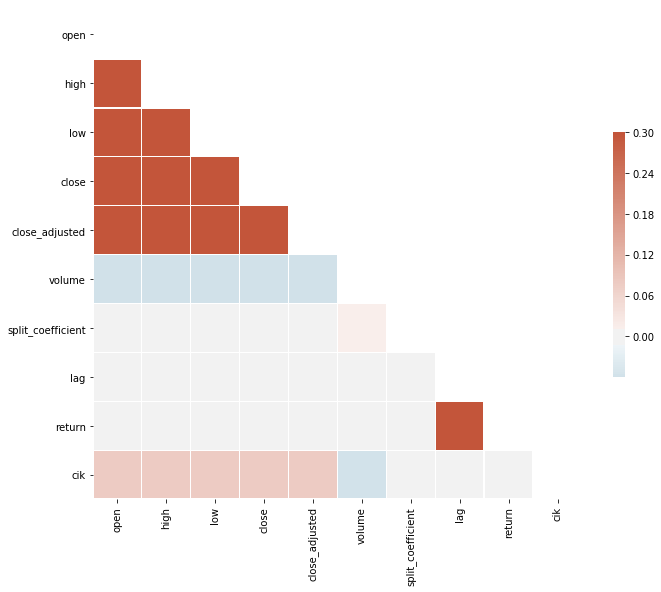

In [34]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

AttributeError: 'Series' object has no attribute 'scatter'

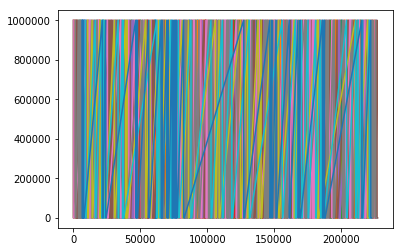

In [40]:
# company_stock_data.groupby('gics sector')['return'].plot().scatter()